### Arewa Data Science Academy
### Deep Learning Cohort1.0
### Name: Ganiu Kuku
### Email: Ganiukuku@gmail.com
### Title: Week 2(Advanced_Assignment) Solution

In [2]:
# import libraries
import zipfile
import pandas as pd

# download dataset in current env
!wget https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip -O data.zip
# unzip data
with zipfile.ZipFile("data.zip", 'r') as my_zip:
  my_zip.extractall()
# read csv and parse to pandas
dataset_name = "synchronous machine.csv"
data = pd.read_csv(dataset_name, delimiter=";", thousands=',')
# get numpy data
numpy_data = data.values

--2025-02-25 14:10:47--  https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip’

data.zip                [ <=>                ]  14.37K  --.-KB/s    in 0.009s  

2025-02-25 14:10:55 (1.57 MB/s) - ‘data.zip’ saved [14713]



In [3]:
import torch
import numpy as np

# (a) Load the Synchronous Machine Learning Dataset as a Numpy array
# Print the shape of the numpy array to confirm it's loaded
print("Shape of the loaded numpy array:", numpy_data.shape)

# You can also print a few rows to inspect the data
print(numpy_data[:5])

# (b) Convert the Numpy array to a PyTorch tensor
original_data_tensor = torch.tensor(numpy_data, dtype=torch.float32)
print("Original Data Tensor:", original_data_tensor)

Shape of the loaded numpy array: (557, 5)
[[   3   66   34  383 1563]
 [   3   68   32  372 1552]
 [   3    7    3   36  154]
 [   3   72   28  338 1518]
 [   3   74   26  317 1497]]
Original Data Tensor: tensor([[3.0000e+00, 6.6000e+01, 3.4000e+01, 3.8300e+02, 1.5630e+03],
        [3.0000e+00, 6.8000e+01, 3.2000e+01, 3.7200e+02, 1.5520e+03],
        [3.0000e+00, 7.0000e+00, 3.0000e+00, 3.6000e+01, 1.5400e+02],
        ...,
        [6.0000e+00, 9.5000e+01, 5.0000e+00, 1.6000e+01, 1.3400e+02],
        [6.0000e+00, 9.7000e+01, 3.0000e+00, 1.6000e+01, 1.3400e+02],
        [6.0000e+00, 9.9000e+01, 1.0000e+00, 1.6000e+01, 1.3400e+02]])


In [4]:
print("Size of the dataset:", original_data_tensor.size())

Size of the dataset: torch.Size([557, 5])


In [5]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create a tensor of the same size as original_data_tensor with values 3.142
my_pi_tensor = torch.full_like(original_data_tensor, 3.142, device=device)

# Print the first 13 rows
print("First 13 rows of my_pi_tensor:", my_pi_tensor[:13])

# Print tensor device location
print("Tensor device location:", my_pi_tensor.device)

# Print tensor datatype
print("Tensor datatype:", my_pi_tensor.dtype)

First 13 rows of my_pi_tensor: tensor([[3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420]])
Tensor device location: cpu
Tensor datatype: torch.float32


In [6]:
sum_values = torch.sum(my_pi_tensor)
fifth_root = sum_values ** (1/5)
print("Fifth-root of the sum of all values:", fifth_root.item())

Fifth-root of the sum of all values: 6.143364429473877


In [7]:
first_100_rows = original_data_tensor[:100]
last_100_rows = original_data_tensor[-100:]
my_data_tensor = torch.cat((first_100_rows, last_100_rows), dim=0)
print("Size of my_data_tensor:", my_data_tensor.size())

Size of my_data_tensor: torch.Size([200, 5])


In [8]:
# Assuming column 0 is 'diff' and column 1 is 'If'
features = my_data_tensor[:, 0]  # First column as features
target = my_data_tensor[:, 1]    # Second column as target

print("Features tensor:", features)
print("Target tensor:", target)

Features tensor: tensor([ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
         3.,  3.,  3.,  3., 31., 31., 31., 31., 31., 31., 31., 31., 31., 31.,
        31., 31., 31., 31., 31., 31., 31., 31., 32., 32., 32., 32., 32., 32.,
        32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 32., 33., 33.,
        33., 33., 33., 33., 33., 33., 33., 33., 33., 33., 33., 33., 33., 33.,
        33., 33., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34.,
        34., 34., 34., 34., 34., 34., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 35., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 56., 56.,
        56., 56., 56., 56., 56., 56., 56., 56., 56., 56., 56., 56., 56., 56.,
        56., 56., 57., 57., 57., 57., 57., 57., 57., 57., 57., 57., 57., 57.,
        57., 57., 57., 57., 57., 57., 58., 58., 58., 58., 58., 58., 58., 58.,
        58., 58., 58., 58., 58., 58., 58., 58., 58., 58., 59., 59., 59., 59.,
        59., 59., 59., 59., 59., 59., 59., 59.,

In [9]:
# Calculate the split index
split_idx = int(0.75 * len(features))

# Split features and target into training and test sets
train_features, test_features = features[:split_idx], features[split_idx:]
train_target, test_target = target[:split_idx], target[split_idx:]

print("Training features size:", train_features.size())
print("Test features size:", test_features.size())

Training features size: torch.Size([150])
Test features size: torch.Size([50])


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define a simple linear model
class LinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

# Initialize the model
input_dim = 1  # Assuming 1 feature (e.g., 'diff')
output_dim = 1  # Assuming 1 target (e.g., 'If')
model = LinearModel(input_dim, output_dim)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

Epoch [10/100], Train Loss: 1014108859383142475574420701184.0000, Test Loss: 1388961760665475688172771071754240.0000
Epoch [20/100], Train Loss: inf, Test Loss: inf
Epoch [30/100], Train Loss: nan, Test Loss: nan
Epoch [40/100], Train Loss: nan, Test Loss: nan
Epoch [50/100], Train Loss: nan, Test Loss: nan
Epoch [60/100], Train Loss: nan, Test Loss: nan
Epoch [70/100], Train Loss: nan, Test Loss: nan
Epoch [80/100], Train Loss: nan, Test Loss: nan
Epoch [90/100], Train Loss: nan, Test Loss: nan
Epoch [100/100], Train Loss: nan, Test Loss: nan


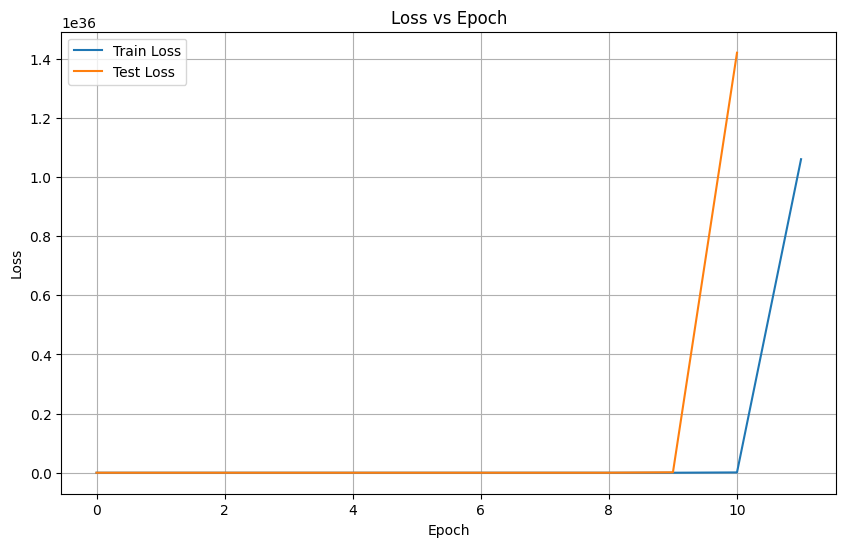

In [11]:
# Prepare data (assuming features and target are already defined)
# Reshape features and target to match model input/output dimensions
train_features = train_features.unsqueeze(1).to(device)
train_target = train_target.unsqueeze(1).to(device)
test_features = test_features.unsqueeze(1).to(device)
test_target = test_target.unsqueeze(1).to(device)

# Training loop
num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()
    outputs = model(train_features)
    loss = criterion(outputs, train_target)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Testing phase
    model.eval()
    with torch.no_grad():
        test_outputs = model(test_features)
        test_loss = criterion(test_outputs, test_target)
        test_losses.append(test_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Plot Loss vs Epoch
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label="Train Loss")
plt.plot(range(num_epochs), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()
plt.grid()
plt.show()

### **The model is experiencing an exploding gradient problem, leading to inf and nan losses. This is likely due to a too-high learning rate, poor weight initialization, or lack of gradient clipping. To improve the model we can:**

## **Reduce the learning rate.**
## **Apply gradient clipping.**
## **Normalize input data.**
## **Use a more stable loss function or optimizer.**